In [111]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [112]:
# Create a torch model with 2 parameters, slope and intercept:
model = nn.Sequential(
    nn.Linear(1,1, bias=True)
)

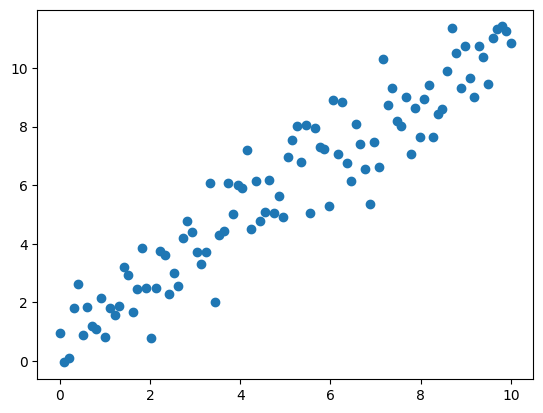

In [113]:
# Generate some noisy data:
x = np.linspace(0, 10, 100)
y = 1*x + 1 + np.random.normal(0, 1, 100)
plt.plot(x, y, 'o')

In [114]:
# Fit the model to the data:
loss_fn = nn.MSELoss()
# TODO: Play with the learning rate "lr" below and optimizer (Adam, SGD, etc):
optimizer = torch.optim.SGD(model.parameters(), lr=0.8)
weights = []
biases = []
losses = []
for i in range(1000):
    optimizer.zero_grad()
    y_pred = model(torch.from_numpy(x[:,None]).float())
    loss = loss_fn(y_pred, torch.from_numpy(y[:,None]).float())
    losses.append(loss.data.numpy())
    loss.backward()
    optimizer.step()
    weights.append(model[0].weight.data.numpy()[0,0])
    biases.append(model[0].bias.data.numpy()[0])

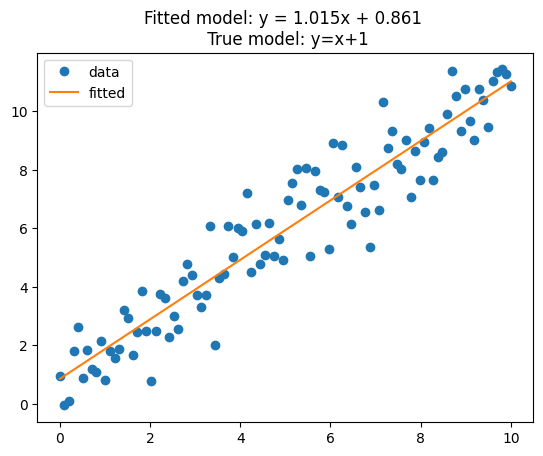

In [115]:
# Plot the results:
plt.plot(x, y, 'o', label='data')
plt.plot(x, model(torch.from_numpy(x[:,None]).float()).data.numpy(), '-', label='fitted')
plt.title('Fitted model: y = {:.3f}x + {:.3f} \n True model: y=x+1'.format(weights[-1], biases[-1]))
plt.legend()

Text(0, 0.5, 'loss')

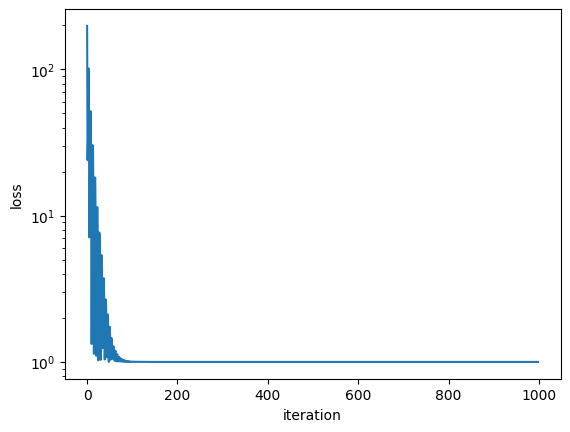

In [116]:
# plot loss:
plt.figure()
plt.plot(losses[1:])
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('loss')

Text(0.5, 1.0, 'Parameter values over training')

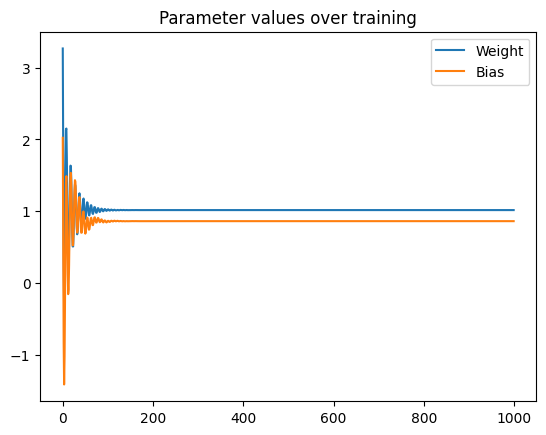

In [117]:
# Plot the training progress:
plt.figure()
plt.plot(weights)
plt.plot(biases)
plt.legend(['Weight', 'Bias'])
plt.title('Parameter values over training')

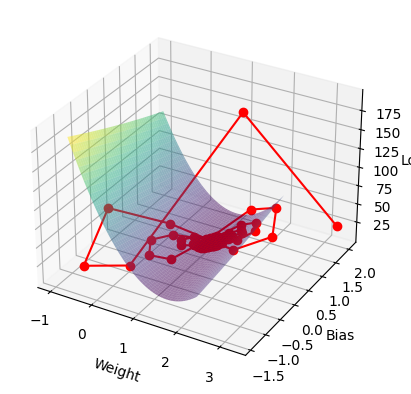

In [118]:
# Plot loss as a function of the parameters:
# tile parameter space:
w = np.linspace(-1, 2, 100)
b = np.linspace(-1, 2, 100)
W, B = np.meshgrid(w, b)
# get loss for corresponding model:
loss = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        model[0].weight.data[0,0] = W[i,j]
        model[0].bias.data[0] = B[i,j]
        loss[i,j] = loss_fn(model(torch.from_numpy(x[:,None]).float()), torch.from_numpy(y[:,None]).float()).data.numpy()

# plot loss in 3d
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', azim=-60, elev=30)
ax.plot_surface(W, B, loss, cmap='viridis', alpha=0.5)
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss')
# Plot the trajectory of the optimizer so that it can be seen atop the loss surface:
ax.plot(weights, biases, losses, 'o-', color='red')


KeyboardInterrupt: 

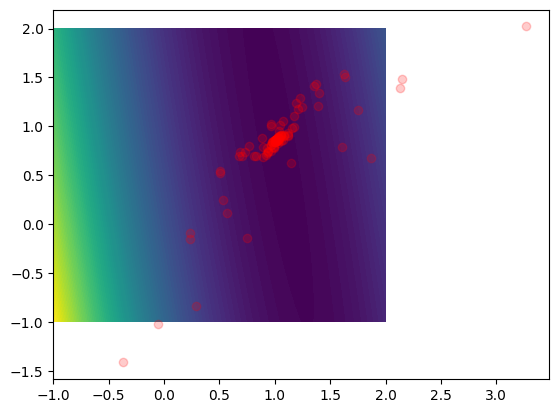

In [119]:
# Plot in 2d with contours:
plt.figure()
plt.contourf(W, B, loss, 100, cmap='viridis')
# plt.plot(weights, biases, 'o-', color='red')
# plot with decay in alpha value over time:
for i in range(len(weights)):
    plt.plot(weights[i], biases[i], 'o-', color='red', alpha=min(i/len(weights)+0.2,1))
# final point as star:
plt.plot(weights[-1], biases[-1], '*', color='yellow', markersize=15)
# green dot for initial point:
plt.plot(weights[0], biases[0], 'o', color='green', markersize=10)
plt.xlabel('Weight')
plt.ylabel('Bias')
plt.colorbar()
plt.show()
